# Advanced Image Recognition Techniques

**Objective:**
Explore and compare the effectiveness of various feature extraction techniques in image 
recognition tasks, both before and after image enhancement, with a focus on ensemble methods.

The project involves two parts:

**Part 1: Image Enhancement and Feature Extraction**
1. **Dataset Selection:**
   * The dataset must be in fields of image recognition.
   * The dataset should be challenging yet manageable (like: face recognition, fingerprint recognition, medical image diagnosis, etc.).
   * Consider datasets from sources like Kaggle, UCI Machine Learning Repository, or create a custom dataset if applicable.
2. **Feature Extraction Techniques:**
   * Implement at least three feature extraction methods: like LBP, HOG, and SIFT.
   * Provide a brief theoretical background of each method in the report and Jupyter Notebook.
3. **Image Enhancement:**
   * Apply at least two different image enhancement techniques such as histogram equalization, noise reduction, or sharpening filters.
   * Document the rationale behind choosing specific enhancement techniques and their expected impact on the image quality and feature extraction.
4. **Comparative Analysis:**
   * Analyze how feature extraction results vary before and after image enhancement.
   * Use visual aids like plots or image grids in the Jupyter Notebook to demonstrate the differences.  
   
**Part 2: Classification and Ensemble Methods**
1. **Classification Model Implementation:**
   * Implement a classification model suitable for the dataset.
   * Document the model selection process, including any parameter tuning or optimization techniques used.
2. **Ensemble Techniques (Bonus):**
   * Combine different feature extraction techniques using ensemble methods like stacking or voting classifiers.
   * Compare the classification performance using individual features versus the ensemble approach.
   * Extra marks are awarded for innovative ensemble strategies and clear demonstration of their effectiveness.
3. **Evaluation and Comparative Analysis:**
   * Use metrics like accuracy, precision, recall, and F1-score to evaluate the classification models.
   * Discuss the impact of image enhancement on the classification results.

### Doctor Name:
**Fahman Saeed**

------
### Student Name & ID:
**Fahad Alotaibi**   **440025364**

## Contents

1. [Importing Dependencies](#Importing-Dependencies)
2. [Loading the Dataset](#Loading-the-Dataset)
3. [Methodology](#Methodology)

   3.1 [Feature extraction](#Feature-extraction)    
      3.1.1 [Local Binary Patterns (LBP)](#Local-Binary-Patterns-(LBP))      
      3.1.2 [Histogram of Oriented Gradients (HOG)](#Histogram-of-Oriented-Gradients-(HOG))   
      3.1.3 [The scale-invariant feature transform (SIFT)](#The-scale-invariant-feature-transform-(SIFT))  
   3.2 [Image Enhancement](#Image-Enhancement) 
   
      3.2.1 [Smoothing (Lowpass) Filtering](#Smoothing-(Lowpass)-Filtering)  
      3.2.2 [Sharpening (Highpass) Filters](#Sharpening-(Highpass)-Filters)
      
      3.2.3 [Histogram Equalization](#Histogram-Equalization) 
4. [Comparative Analysis](#Comparative-Analysis:)
5. [Classification Model Implementation](#Classification-Model-Implementation)

   5.1 [Confusion Matrix](#Confusion-Matrix)
6. [Ensemble Techniques](#Ensemble-Techniques)
7. [Conclusion](#Conclusion)
8. [Reference](#Reference)

## Importing Dependencies

In [59]:
# Import the required modules
import cv2 # library that can perform various operations on images
import numpy as np # library that can perform various operations on arrays and matrices
import seaborn as sns # library that can visualization, create and customize various types of graphs and charts
from sklearn import svm # library contains various support vector machine models that can perform classification and regression tasks
from scipy import stats # library that can perform various statistical functions and tests
from skimage import feature # library that can extract various features from images
from skimage import exposure # library, which is an image processing module that can adjust the contrast and brightness of an image
from skimage.feature import hog # library, which is a feature extraction technique that can compute the histogram of oriented gradients (HOG) of an image
from sklearn.cluster import KMeans # library which is a clustering algorithm that can group similar data points into clusters
from matplotlib import pyplot as plt # library that can create and customize various types of graphs and charts
from sklearn.metrics import accuracy_score # library which are evaluation metrics that can measure the performance of a classification model
from sklearn.metrics import confusion_matrix # library which is an evaluation metric that can create a matrix that shows the true and predicted labels of a classification model
from sklearn.ensemble import ExtraTreesClassifier # For creating an ensemble of randomized decision trees for classification
from sklearn.metrics import classification_report # library which are evaluation metrics that can measure the performance of a classification model
from sklearn.ensemble import RandomForestClassifier # library which is a machine learning model that can perform classification tasks using multiple decision trees
from sklearn.model_selection import train_test_split # library which is a utility function that can split a dataset into training and testing subsets

## Loading the Dataset
This dataset was created from FVC2000 DB4 B, which is one of the four datasets used in the First International Fingerprint Verification Competition (FVC2000).

The dataset contains $800$ fingerprint images of $10$ fingers.

The images are in array format and have a shape of $160x160$ pixels, the images are grayscale, which means they have only one color channel.

The dataset meets the project criteria and is suitable for the techniques to be applied.

In [4]:
# Load the image data from a numpy file
img_data = np.load("Fingerprint Dataset for FVC2000_DB4_B/dataset_FVC2000_DB4_B/dataset/np_data/img_train.npy")
# Load the label data from a numpy file
label_data = np.load("Fingerprint Dataset for FVC2000_DB4_B/dataset_FVC2000_DB4_B/dataset/np_data/label_train.npy")
# Print the shape of the image and label data
print(img_data.shape, label_data.shape)

(800, 160, 160, 1) (800, 1)


In [16]:
# Reshape the image data from a 4-dimensional array to a 3-dimensional array (to do some opration on the data)
GRAY_image = img_data.reshape(img_data.shape[:3])
# Print the shape after reshape the image data
GRAY_image.shape

(800, 160, 160)

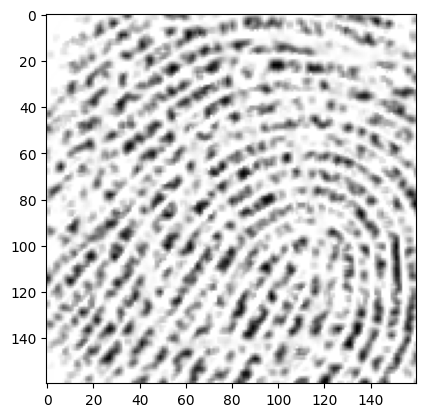

In [133]:
# Determine the numper of the image you want to show
i = 0
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
# Show shape.
plt.show()

## Methodology

### **Feature extraction**

Feature extraction is a process of transforming raw data, such as images, into a set of numerical values that can be used for further analysis, such as classification or recognition. Feature extraction methods aim to capture the most relevant and distinctive information from the data, while reducing the dimensionality and complexity of the data.

Some common feature extraction methods for images are:
- **Local Binary Patterns (LBP)**: This method converts each pixel in an image into a binary code based on the comparison of its intensity with its neighboring pixels. The binary codes are then grouped into regions and histograms are computed for each region. The histograms represent the frequency of occurrence of different binary patterns in the regions. LBP is a simple and efficient method that can capture the local texture and contrast information of an image.
- **Histogram of Oriented Gradients (HOG)**: This method divides an image into small cells and computes the histogram of gradient directions for each cell. The gradient direction indicates the direction of change in pixel intensity, and the histogram captures the distribution of edge orientations in the cell. The histograms are then normalized and concatenated to form a feature vector for the image. HOG is a powerful method that can capture the shape and contour information of an image.
- **Scale-Invariant Feature Transform (SIFT)**: This method detects and describes keypoints in an image that are invariant to scale, rotation, and illumination changes. A keypoint is a point of interest in an image that has a distinctive local appearance. For each keypoint, a descriptor is computed that captures the gradient information of a patch around the keypoint. The descriptors are then matched across different images to find correspondences. SIFT is a robust method that can capture the salient and stable features of an image.

### Local Binary Patterns (LBP)
The local binary pattern (LBP) is one of the popular texture descriptors used in computer vision. 

LBP is based on appearance features. It is a way to describe the local structure of an image in a way that is invariant to changes in illumination. LBP was first introduced in 1994 and has since been used in a wide range of applications, including object recognition, face detection, and texture classification. Its simplicity and effectiveness make it a popular choice for many computer vision tasks.

Local Binary Patterns (LBP) are a way to describe the texture of an image by comparing the intensity of each pixel with its neighbors. To apply LBP, you need to follow these steps:

- Choose a pixel in the image and select its neighboring pixels in a circular or rectangular region around it.
- Take the threshold (intensity of the selected pixel, here it is 50).
- Go through every neighboring pixel and check whether its intensity is greater than or less than the threshold.
- Assign a binary value of 1 or 0 to each neighbor based on the comparison result.
- Concatenate the binary values of all neighbors to form a binary code for the selected pixel.
- Repeat the process for all pixels in the image and obtain the LBP representation of the image.
- Compute a histogram of the LBP codes and use it as a feature vector for classification or retrieval tasks.

Here is an example of applying LBP to a 3x3 image patch:

```
|  90 |  80 |  60 |
| 100 |  50 |  40 |
|  20 |  30 |  10 |
```

- The center pixel has an intensity of 50, which is the threshold.
- The top-left pixel has an intensity of 90, which is greater than the threshold, so it gets a binary value of 1.
- The top pixel has an intensity of 80, which is greater than the threshold, so it gets a binary value of 1.
- The top-right pixel has an intensity of 60, which is greater than the threshold, so it gets a binary value of 1.
- The right pixel has an intensity of 40, which is less than the threshold, so it gets a binary value of 0.
- The bottom-right pixel has an intensity of 10, which is less than the threshold, so it gets a binary value of 0.
- The bottom pixel has an intensity of 30, which is less than the threshold, so it gets a binary value of 0.
- The bottom-left pixel has an intensity of 20, which is less than the threshold, so it gets a binary value of 0.
- The left pixel has an intensity of 100, which is greater than the threshold, so it gets a binary value of 1.

The binary code for the center pixel is 11100001, which is 225 in decimal. 

Now, the resulted matrix will look like,
```
|  90 |  80 |  60 |
| 100 | 225 |  40 |
|  20 |  30 |  10 |
```

In [17]:
# Define a function to apply local binary pattern (LBP) on images
# The function takes a set of images and two optional parameters: radius and sampling_pixels
# The function return the LBP images and features as the output of the function
def LBP(images, radius=1, sampling_pixels=8):
    # To get the shape of the images
    SHAPE = images.shape
    # Initialize an array of zeros with the same shape as the images, which will store the LBP images
    LBP_images = np.zeros_like(images)
    # Initialize an array of zeros with the shape of (the number of images, 160), which will store the LBP features for each image
    LBP_features = np.zeros((SHAPE[0], 160))
    # Initialize a variable named o, which will keep track of the index of the current image
    o = 0
    # Loop through each image in the images array
    for image in images:
        # Compute the LBP for the image using the skimage.feature.local_binary_pattern function
        lbp = feature.local_binary_pattern(image, sampling_pixels, radius, method="uniform")
        # Assign the LBP image to the corresponding index in the LBP images array
        LBP_images[o] = lbp
        # Divide the image into a grid of cells and compute the histogram of the LBP codes for each cell
        n_cells = 4 # the number of cells along each dimension
        cell_size = image.shape[0] // n_cells # the size of each cell
        histograms = [] # the list of histograms for each cell
        # Loop through each row of cells in the image
        for i in range(n_cells):
            # Loop through each column of cells in the image
            for j in range(n_cells):
                # Get the cell region
                cell = lbp[i * cell_size : (i + 1) * cell_size, j * cell_size : (j + 1) * cell_size]
                # Compute the histogram of the cell
                n_bins = int(lbp.max() + 1) # the number of bins for the histogram
                hist, _ = np.histogram(cell, density=True, bins=n_bins, range=(0, n_bins))
                # Append the histogram to the list
                histograms.append(hist)
        # Concatenate the histograms of all the cells into a single feature vector
        features = np.concatenate(histograms)
        # Normalize the feature vector to have unit length
        LBP_features[o] = features / np.linalg.norm(features)
        # Increment the index of the current image by one
        o += 1
    # Return the LBP images and features arrays as the output of the function
    return LBP_images, LBP_features

In [20]:
# Call the LBP function on the grayscale image and assign the outputs to two variables
# The LBP function returns two outputs: a list of images with LBP patterns drawn and a list of feature vectors for each image
LBP_images, LBP_features = LBP(GRAY_image)

In [21]:
# Print the shape of the LBP images
print("Shape of LBP images: ",LBP_images.shape)
# Print the shape of the LBP features
print("Shape of LBP features: ",LBP_features.shape)

# Print the values of the LBP features using the print function
# The values are arrays of numbers representing the histograms of LBP patterns for each image
print(LBP_features)

Shape of LBP images:  (800, 160, 160)
Shape of LBP features:  (800, 160)
[[0.01313713 0.02975173 0.01429628 ... 0.02743341 0.02550148 0.06993588]
 [0.02141603 0.04414326 0.03802439 ... 0.05812924 0.17307653 0.06206279]
 [0.02462706 0.06244719 0.04969389 ... 0.04969389 0.02990429 0.09059241]
 ...
 [0.02758621 0.04492611 0.04098522 ... 0.02522168 0.13280788 0.07251232]
 [0.02857379 0.04603555 0.04603555 ... 0.02262092 0.16747416 0.05198843]
 [0.02589092 0.03609038 0.04393611 ... 0.01608376 0.23537203 0.04864355]]


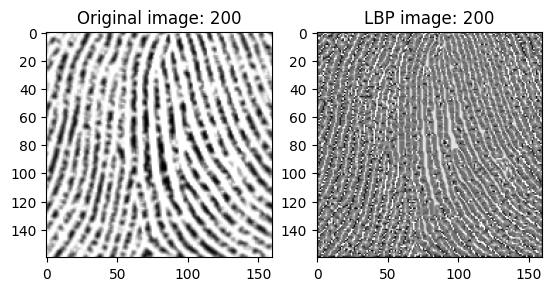

In [82]:
# Determine the numper of the image you want to show
i = 200
# Determine the position of the original image in the shape.
plt.subplot(121)
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
plt.title("Original image: " + str(i))
# Determine the position of the LBP image in the shape.
plt.subplot(122)
# show the photo.
plt.imshow(LBP_images[i], cmap='gray')
plt.title("LBP image: " + str(i))
# Show shape.
plt.show()

### Histogram of Oriented Gradients (HOG)
This method divides an image into small cells and computes the histogram of gradient directions for each cell. The gradient direction indicates the direction of change in pixel intensity, and the histogram captures the distribution of edge orientations in the cell. The histograms are then normalized and concatenated to form a feature vector for the image. HOG is a powerful method that can capture the shape and contour information of an image.

Compute a Histogram of Oriented Gradients (HOG) by:
1. (optional) global image normalisation
2. computing the gradient image in x and y
3. computing gradient histograms
4. normalising across blocks
5. flattening into a feature vector

The first stage applies an optional global image normalisation equalisation that is designed to reduce the influence of illumination effects. In practice we use gamma (power law) compression, either computing the square root or the log of each color channel. Image texture strength is typically proportional to the local surface illumination so this compression helps to reduce the effects of local shadowing and illumination variations.

The second stage computes first order image gradients. These capture contour, silhouette and some texture information, while providing further resistance to illumination variations. The locally dominant color channel is used, which provides color invariance to a large extent. Variant methods may also include second order image derivatives, which act as primitive bar detectors - a useful feature for capturing, e.g. bar like structures in bicycles and limbs in humans.

The third stage aims to produce an encoding that is sensitive to local image content while remaining resistant to small changes in pose or appearance. The adopted method pools gradient orientation information locally in the same way as the SIFT [2] feature. The image window is divided into small spatial regions, called “cells”. For each cell we accumulate a local 1-D histogram of gradient or edge orientations over all the pixels in the cell. This combined cell-level 1-D histogram forms the basic “orientation histogram” representation. Each orientation histogram divides the gradient angle range into a fixed number of predetermined bins. The gradient magnitudes of the pixels in the cell are used to vote into the orientation histogram.

The fourth stage computes normalisation, which takes local groups of cells and contrast normalises their overall responses before passing to next stage. Normalisation introduces better invariance to illumination, shadowing, and edge contrast. It is performed by accumulating a measure of local histogram “energy” over local groups of cells that we call “blocks”. The result is used to normalise each cell in the block. Typically each individual cell is shared between several blocks, but its normalisations are block dependent and thus different. The cell thus appears several times in the final output vector with different normalisations. This may seem redundant but it improves the performance. We refer to the normalised block descriptors as Histogram of Oriented Gradient (HOG) descriptors.

The final step collects the HOG descriptors from all blocks of a dense overlapping grid of blocks covering the detection window into a combined feature vector for use in the window classifier.

In [22]:
# Define a function to apply histogram of oriented gradients (HOG) on images
# The function takes a set of images
# The function return the HOG images and features as the output of the function
def HOG(images):
    # Get the shape of the images
    SHAPE = images.shape
    # Initialize an array of zeros with the same shape as the images, which will store the HOG images
    HOG_images = np.zeros_like(images)
    # Initialize an array of zeros with the shape of (the number of images, 12996), to store the HOG features for each image
    HOG_features = np.zeros((SHAPE[0], 12996))
    # Initialize a variable named i, which will keep track of the index of the current image
    i = 0
    # Loop through each image in the images array
    for image in images:
        # Compute the HOG features and the HOG image for the image
        features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        # Rescale the intensity of the HOG image for btter visualization
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        # Assign the rescaled HOG image to the corresponding index in the HOG images array
        HOG_images[i] = hog_image_rescaled
        # Assign the HOG features to the corresponding index in the HOG features array
        HOG_features[i] = features
        # Increment the index of the current image by one
        i += 1
    # Return the HOG images and features arrays as the output of the function
    return HOG_images, HOG_features

In [28]:
# Call the HOG function on the grayscale image and assign the outputs to two variables
# The HOG function returns two outputs: a list of HOG images and a list of feature vectors for each image
HOG_images, HOG_features = HOG(GRAY_image)

In [29]:
# Print the shape of the HOG images
print("Shape of HOG images: ", HOG_images.shape)
# Print the shape of the HOG features
print("Shape of HOG features: ", HOG_features.shape)

# Print the values of the HOG features using the print function
# The values are arrays of numbers representing the histograms of oriented gradients for each image
print(HOG_features)

Shape of HOG images:  (800, 160, 160)
Shape of HOG features:  (800, 12996)
[[0.02075456 0.00421896 0.02935137 ... 0.10104152 0.1095596  0.04716059]
 [0.01537462 0.         0.         ... 0.10045937 0.         0.        ]
 [0.26413209 0.18833105 0.11038433 ... 0.23485035 0.15138738 0.19135673]
 ...
 [0.18531346 0.09361483 0.11430363 ... 0.03211299 0.07484813 0.0863528 ]
 [0.27288914 0.15234134 0.1200076  ... 0.24567864 0.09427766 0.07669669]
 [0.15187019 0.13277946 0.08761209 ... 0.11300026 0.09803423 0.03880161]]


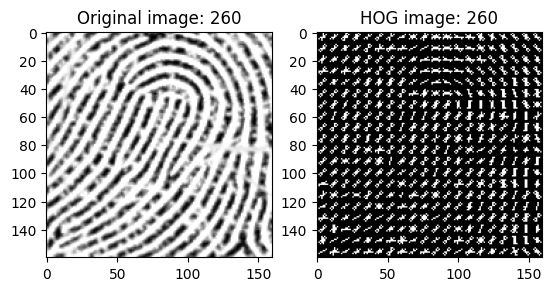

In [132]:
# Determine the numper of the image you want to show
i = 260
# Determine the position of the original image in the shape.
plt.subplot(121)
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
plt.title("Original image: " + str(i))
# Determine the position of the HOG image in the shape.
plt.subplot(122)
# show the photo.
plt.imshow(HOG_images[i], cmap='gray')
plt.title("HOG image: " + str(i))
# Show shape.
plt.show()

### The scale-invariant feature transform (SIFT)
In computer vision, a necessary step in many classification and regression tasks is to detect interesting points (also called keypoint detection). Then, for each point, it is also useful to provide a feature description that is invariant in scaling, rotation, and illumination changes. These properties are necessary to ensure that the points are detectable even under these transformations in an image.

After computing a descriptor for each point of interest, we can use them for classification tasks like detecting objects in an image. Also, they are useful in image matching where our goal is to match points between different views of a 3-D scene.

A well-known and very robust algorithm for detecting interesting points and computing feature descriptions is SIFT which stands for Scale-Invariant Feature Transform.

The **scale-invariant feature transform (SIFT)** is an algorithm used to detect and describe local features in digital images. It locates certain key points and then furnishes them with quantitative information (so-called descriptors) which can for example be used for object recognition. The descriptors are supposed to be invariant against various transformations which might make images look different although they represent the same object(s).

**Main Steps**
1. Scale-Space
   The first step is to compute the scale-space of the image which is the result of the convolution of a Gaussian kernel \mathbf{G} at different scales with the image \mathbf{I}. But, why do we need this?
   
   Objects in the real world are discriminative at certain scales. For example, in the below figure the eyes of the woman are more discriminative in the right image where the scale is large while the hat (a large object) is more discriminative in smaller scales (left image):
   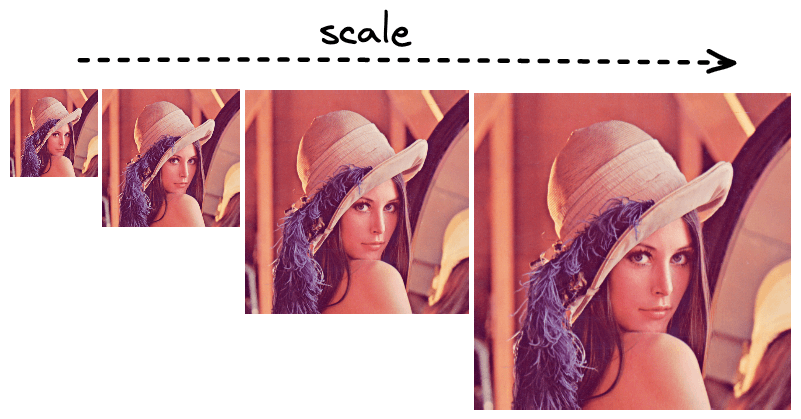
   So, we need to represent an image in multiple scales to infer interesting points across many scales. To achieve this, we use the Gaussian kernel that is defined as:
   
   $G(x, y, \sigma) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} $
   
   where $x$,$y$ are the coordinates of each pixel and $\sigma$ is the parameter related to the scale.
   
   To represent an image \mathbf{I} in multiple scales, we compute the convolution of the image with the kernel at each scale. The equation is defined as:
   
   $L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)$

2. Find Keypoints using DoG
   The next step is to find the interesting points using the Difference of Gaussians (DoG). Specifically, we take the different versions of the image according to the scale and compute their differences.
   
   Then, we compare the value of each pixel with its 8 neighbors in the same scale as well as the 9 pixels in the next and in the previous scale. In case its value is smaller or larger than all of these values it is considered a possible interest point.
   
   In the diagram below, we can see in orange the pixels that we have to compare with a specific point:
   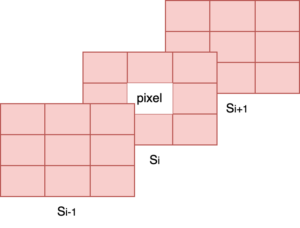
   
   However, the points that satisfy the above condition are many and we want to keep only the most discriminative. So, we compare the intensity of each point with a predefined threshold and keep only the ones that are above the threshold.
   
3. Compute Orientation
   Now that we have detected some interesting points at certain scales, we also want to compute their orientation. So, we define an orientation histogram of 36 bins that covers 360^{\circ} in total. Each bin i contains the degrees in the range [i*10, (i+1)*10).
   
   For example, if the gradient direction of a pixel is 32^{\circ} and the gradient amplitude is 10, then we add the value of 10 in the 4th bin.
   
   In the below image, we can see how a sample histogram looks:
   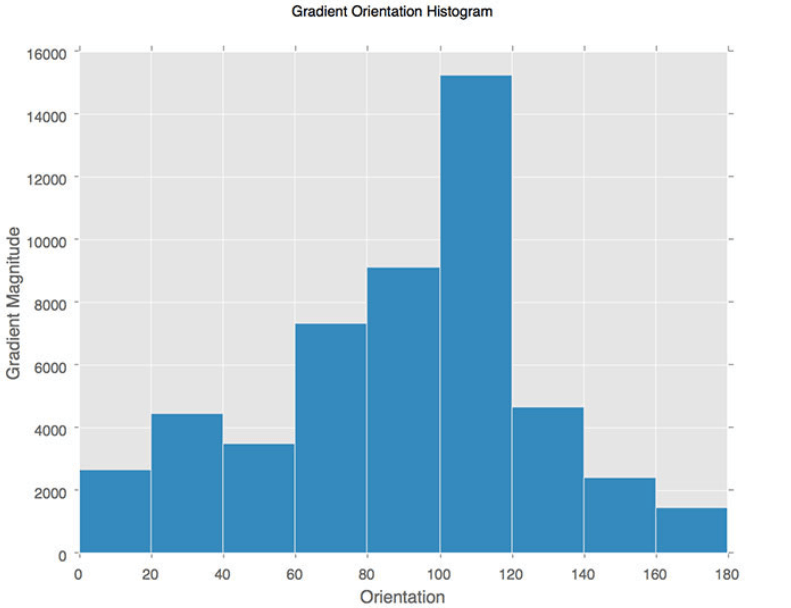
   We compute a histogram like the above for each interesting point. The orientation of the point is the angle with the maximum value in the histogram.
   
4. Compute Descriptors
   At this stage, we have some interesting points along with their location, their scale, and their orientation. The final step is to compute a descriptor for the region around each detected point.
   
   First, we take a patch of size $16 \times 16$ around each point and divide it into $16$ sub-blocks of $4 \times 4$ size. For each sub-block, we compute an 8-bin orientation histogram as in the previous step. So, we end up with $8 \times 4 \times 4 = 128$ values. These $128$ values correspond to the feature vector of the point.
   
   Below, we can see the computation of the feature vector for a certain point:
   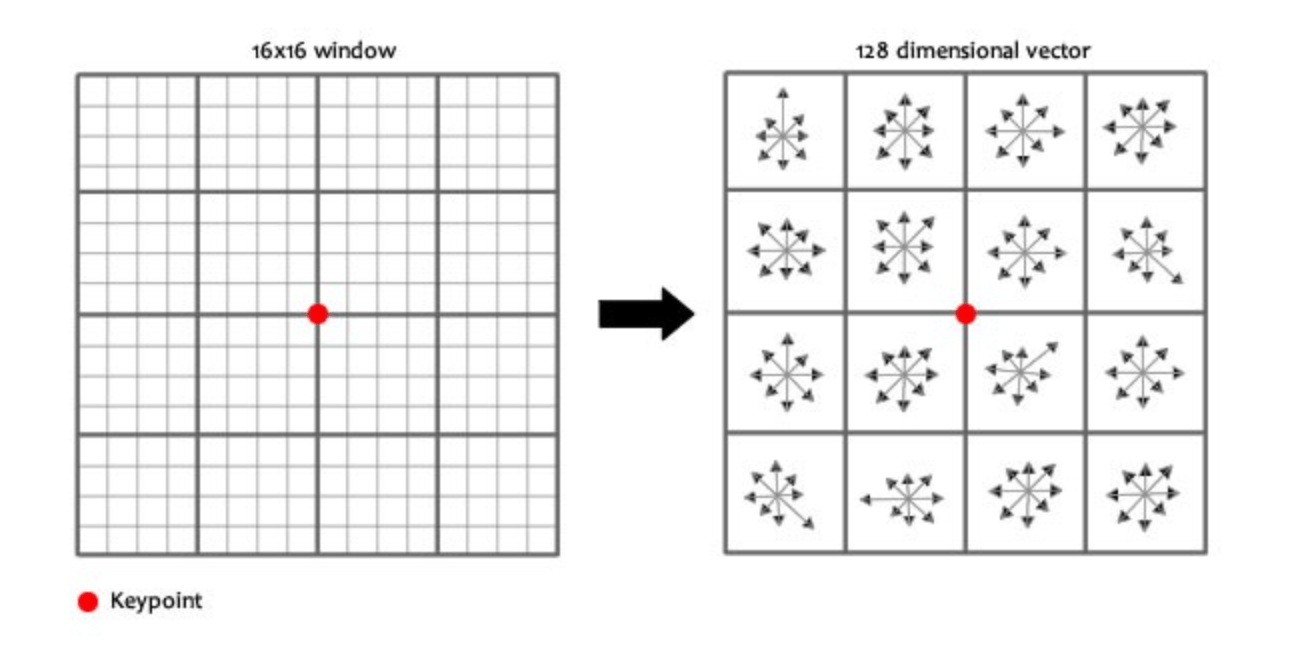
   Finally, we end up with one feature vector of size 128 for each interesting point. These vectors can then be used for any computer vision task we want since they contain all the useful discriminative information we might want.

In [30]:
# This function applies the Scale-Invariant Feature Transform (SIFT) algorithm to a set of images
# The function takes a set of images
# and returns the processed images and their feature vectors
# SIFT is a method to detect and describe local features in images that are invariant to scale, rotation, and illumination changes

def SIFT(images):
    
    # Initialize the output variables
    SIFT_images = np.zeros_like(images) # array of images with SIFT keypoints drawn
    SIFT_keypoints = [] # list of keypoints for each image
    SIFT_descriptors = [] # list of descriptors for each image
    
    # create a SIFT object
    sift = cv2.SIFT_create()
    
    # index variable to keep track of the current image
    i = 0
    # loop through the input images
    for image in images:
        # convert the image to unsigned 8-bit integer type
        image = image.astype(np.uint8)
        # detect the keypoints and compute the descriptors
        keypoints, descriptors = sift.detectAndCompute(image, None)
        # draw the keypoints on the image
        image = cv2.drawKeypoints(image, keypoints, SIFT_images[i], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        # convert the image from BGR (blue, green, red) color space to grayscale and assign the image to the corresponding index in the SIFT images array
        SIFT_images[i] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # append the list of keypoints to the SIFT keypoints list
        SIFT_keypoints.append(keypoints)
        # append the array of descriptors to the SIFT descriptors list
        SIFT_descriptors.append(descriptors)
        # Increment the index of the current image by one
        i += 1
        
    # Concatenate all the descriptors from all the images
    all_descriptors = np.concatenate(SIFT_descriptors, axis=0)
    
    # Cluster the descriptors into visual words using k-means algorithm
    k = 100 # number of clusters or visual words
    # Create a k-means object with the specified number of clusters and random state
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the k-means object to the data of all the descriptors
    kmeans.fit(all_descriptors)
    # get the coordinates of the cluster centers or visual words
    visual_words = kmeans.cluster_centers_
    
    # Compute the histograms of visual words for each image
    histograms = [] # list of histograms for each image
    # loop through the descriptors of each image
    for des in SIFT_descriptors:
        labels = kmeans.predict(des) # labels of the closest visual words
        hist = np.bincount(labels, minlength=k) # histogram of visual words
        histograms.append(hist) # append the histogram to the histograms list
        
    # Normalize the histograms to have unit length
    histograms = np.array(histograms) # convert the list of histograms to an array
    # Compute the Euclidean norm of each histogram along the second axis and keep the result as a column vector
    norm = np.linalg.norm(histograms, axis=1, keepdims=True)
    # divide each histogram by its norm to normalize it
    histograms = histograms / norm 
    # Use the histograms as the feature vectors for the images
    features = histograms
    
    # Return the processed images and their feature vectors
    return SIFT_images, features

In [35]:
# Call the SIFT function on the grayscale image and assign the outputs to two variables
# The SIFT function returns two outputs: a list of images with SIFT keypoints drawn and a list of feature vectors for each image
SIFT_images, SIFT_features = SIFT(GRAY_image)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Print the shape of the SIFT images
print("Shape of SIFT images: ", SIFT_images.shape)
# Print the shape of the SIFT features
print("Shape of SIFT features: ", SIFT_features.shape)

# Print the values of the SIFT features using the print function
# The values are arrays of numbers representing the descriptors of the SIFT keypoints for each image
print(SIFT_features)

Shape of SIFT images:  (800, 160, 160)
Shape of SIFT features:  (800, 100)
[[0.16333843 0.0497117  0.03550835 ... 0.12072841 0.09942339 0.14203342]
 [0.13411211 0.06311158 0.04733369 ... 0.08677843 0.11833422 0.13411211]
 [0.15605961 0.10143875 0.06242385 ... 0.10143875 0.09363577 0.15605961]
 ...
 [0.08709842 0.0072582  0.14516403 ... 0.06532381 0.0217746  0.03629101]
 [0.05174125 0.04434964 0.13304892 ... 0.06652446 0.03695803 0.03695803]
 [0.03662144 0.02929715 0.19775577 ... 0.05127001 0.0585943  0.04394573]]


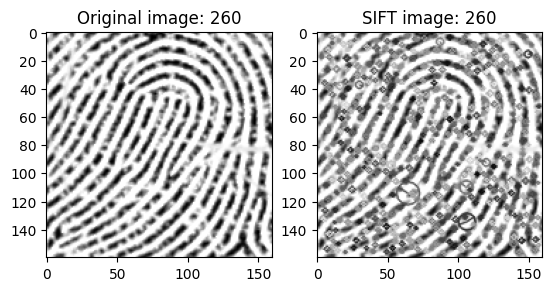

In [138]:
# Determine the numper of the image you want to show
i = 260
# Determine the position of the original image in the shape.
plt.subplot(121)
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
plt.title("Original image: " + str(i))
# Determine the position of the SIFT image in the shape.
plt.subplot(122)
# show the photo.
plt.imshow(SIFT_images[i], cmap='gray')
plt.title("SIFT image: " + str(i))
# Show shape.
plt.show()

### Image Enhancement
**Image enhancement** is the process of improving the quality and appearance of an image by applying various techniques and algorithms. Image enhancement can be used for different purposes, such as:

- Increasing the contrast, brightness, sharpness, or color of an image
- Reducing the noise, blur, or distortion of an image
- Highlighting or extracting certain features or regions of an image
- Restoring or repairing damaged or old images
- Transforming or stylizing an image to create artistic effects

There are many methods and tools for image enhancement, such as:

- Histogram equalization, which adjusts the intensity distribution of an image to improve its contrast
- Filtering, which applies a kernel or a mask to an image to modify its pixels based on their neighbors
- Edge detection, which finds the boundaries or contours of objects in an image
- Feature extraction, which identifies and describes the local or global characteristics of an image
- Super-resolution, which increases the resolution or pixel count of an image
- Inpainting, which fills in the missing or corrupted parts of an image
- Style transfer, which applies the style or texture of one image to another image

### Smoothing (Lowpass) Filtering
Smoothing filters are used for blurring and for noise reduction. 

Blurring is used in preprocessing steps, such as removal of small details from an image prior to (large) object extraction, and bridging of small gaps in lines or curves. 

Noise reduction can be accomplished by blurring with a linear filter and also by non-linear filtering.

In an image:
* Smooth area represents low frequency content.
* Noise and edges represent high frequency content.

Smoothing filters attenuate high frequency part.

**Mean Filter**
* It replaces the intensity of each pixel by the mean intensity of the pixels in a neighborhood around the pixel.
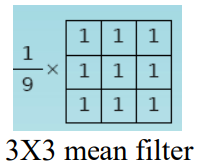
  * Useful in removing noise from images
  * Useful for highlighting gross detail

In [37]:
# This function takes a list of images as input and returns a list of smoothed images as output
# Smoothing is a process of reducing noise and blurring details in an image
# It can be useful for enhancing low-quality images or preparing images for further processing
def smooth(images):
    
    # Create an empty array to store smooth images.
    # The array has the same shape and data type as the input images
    Smooth_Images = np.zeros_like(images)
    
    i = 0 # index variable to keep track of the current image
    for image in images: # loop through the input images
        # Apply smoothing filter using 5x5 mean filter.
        # A mean filter replaces each pixel value with the average of its neighboring pixels
        # Add the smoothed image to the array.
        Smooth_Images[i] = cv2.blur(image, (5, 5))
        
        i += 1 # increment the index variable
        
    # Return the array of smoothed images  
    return Smooth_Images

In [38]:
# Call the smooth function on the grayscale image and assign the output to a variable
# The smooth function returns an array of the same shape and data type as the input image
Smooth_Images = smooth(GRAY_image)

# Print the shape of the smoothed images
print("Shape of smoothed images: ", Smooth_Images.shape)

Shape of smoothed images:  (800, 160, 160)


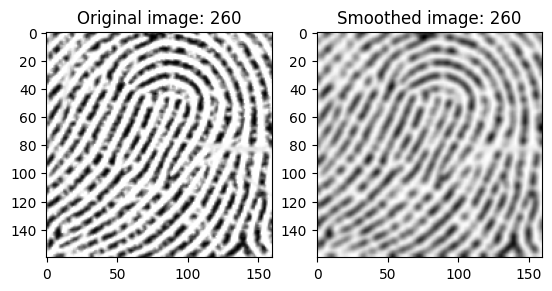

In [139]:
# Determine the numper of the image you want to show
i = 260
# Determine the position of the original image in the shape.
plt.subplot(121)
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
plt.title("Original image: " + str(i))
# Determine the position of the smoothed image in the shape.
plt.subplot(122)
# show the photo.
plt.imshow(Smooth_Images[i], cmap='gray')
plt.title("Smoothed image: " + str(i))
# Show shape.
plt.show()

The rationale behind choosing smooth enhancement techniques is to improve the image quality by removing unwanted artifacts and preserving the important features. However, smooth enhancement techniques may also have some drawbacks, such as:
- They may reduce the contrast and sharpness of the image, and make it less clear and detailed.
- They may introduce some distortion or artifacts, such as ringing or blurring, especially near the edges or boundaries of the image.
- They may affect the feature extraction process, by changing the distribution or values of the features, such as histogram, gradient, or texture.

Therefore, smooth enhancement techniques should be applied carefully and selectively, depending on the type and level of noise and blur in the image, and the purpose and requirements of the feature extraction task.

### Sharpening (Highpass) Filters
Enhance details and edges, remove blurring from images.

Attenuate low frequency components.

**Laplacian Filters**

Laplacian filter is a second-order derivative filter used in edge detection, in digital image processing. 

In 1st order derivative filters, we detect the edge along with horizontal and vertical directions separately and then combine both. 

But using the Laplacian filter we detect the edges in the whole image at once.

The Laplacian is defined as follows:
$$\nabla^2 f(x,y) = \frac{\partial^2 f(x,y)}{\partial x^2} + \frac{\partial^2 f(x,y)}{\partial y^2}$$

The Laplacian Operator/Filter is = 

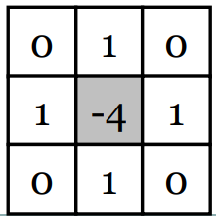

$$g(x, y) = \nabla^2 f(x, y) - f(x, y) = [f(x + 1, y) + f(x - 1, y) + f(x, y + 1) + f(x, y - 1)] - (4 * f(x, y))$$

here the central value of filter is negative.

  Or
  
Filter is = 

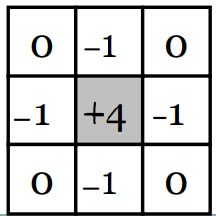

$$g(x, y) = f(x, y) - \nabla^2 f(x, y) = 4 * f(x, y) - f(x + 1, y) - f(x - 1, y) - f(x, y + 1) - f(x, y - 1)$$

here the central value of filter is positive.

Note:The sum of all values of the filter is always 0.

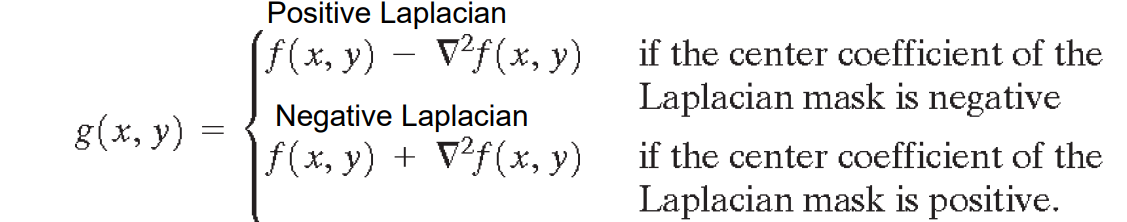

In [39]:
# This function takes a list of images as input and returns a list of sharpened images as output
# Sharpening is a process of enhancing the edges and details in an image
# It can be useful for improving the quality of low-contrast images or highlighting certain features in an image
def sharpening(images):
    
    # Define the Laplacian kernel.
    # A Laplacian kernel is a 3x3 matrix that approximates the second derivative of the image intensity
    # It is used to detect the edges in an image by finding the regions where the intensity changes rapidly
    kernel = np.array([[ 0,-1, 0],
                       [-1, 4,-1],
                       [ 0,-1, 0]])
    
    # Create an empty array to store sharpened images.
    # The array has the same shape and data type as the input images
    sharpened_Images = np.zeros_like(images)
    
    i = 0 # index variable to keep track of the current image
    for image in images:
        # Apply the filter2D function to the grayscale image with the specified kernel.
        # The filter2D function performs a convolution operation between the image and the kernel
        # It produces a new image that highlights the edges and details in the original image
        # Add the sharpened image to the array.
        sharpened_Images[i] = cv2.filter2D(image, -1, kernel)
        
        i += 1 # increment the index variable
        
    # Return the array of sharpened images
    return sharpened_Images

In [40]:
# Call the sharpening function on the grayscale image and assign the output to a variable
# The sharpening function returns an array of the same shape and data type as the input image
sharpened_Images = sharpening(GRAY_image)

# Print the shape of the sharpened images
print("Shape of sharpened images: ", sharpened_Images.shape)

Shape of sharpened images:  (800, 160, 160)


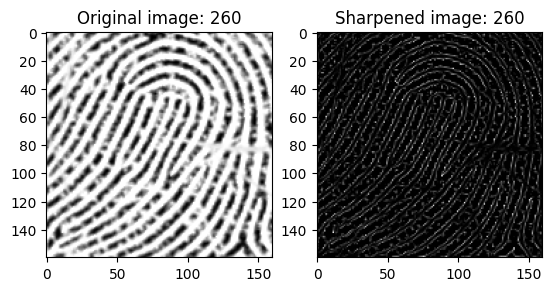

In [140]:
# Determine the numper of the image you want to show
i = 260
# Determine the position of the original image in the shape.
plt.subplot(121)
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
plt.title("Original image: " + str(i))
# Determine the position of the sharpened image in the shape.
plt.subplot(122)
# show the photo.
plt.imshow(sharpened_Images[i], cmap='gray')
plt.title("Sharpened image: " + str(i))
# Show shape.
plt.show()

The rationale behind choosing sharpening enhancement techniques is to improve the image quality by enhancing the features that are important for recognition or analysis. However, sharpening enhancement techniques may also have some drawbacks, such as:

- They may amplify the noise and artifacts in the image, and make it more noisy and distorted.
- They may create some unwanted effects, such as halos or overshoots, especially near the edges or boundaries of the image.
- They may affect the feature extraction process, by changing the distribution or values of the features, such as histogram, gradient, or texture.

Therefore, sharpening enhancement techniques should be applied carefully and selectively, depending on the type and level of noise and blur in the image, and the purpose and requirements of the feature extraction task.

### Histogram Equalization
Histogram equalization is a technique to improve the contrast of an image by adjusting its intensity distribution. It can make the image more clear and enhance the details. It works by spreading out the pixel values that are clustered in a narrow range, so that they can use the full range of possible intensities.

**Method:**
1. Compute image histogram $h(r_{k}) = n_{k}; k= 1,2,...,L$
2. Normalize histogram to find $P(r_{k})$
3. Transform the gray level values using
$$S_{k} = T(r_{k}) = \sum \limits _{j=1} ^{k} P(r_{j})$$
where:
- $r_{k}$: input gray-level value (intensity)
- $S_{k}$: output gray-level value
- $k = 1,2,...,L$

**Image Normaliztion**
It makes easy to compare two images taken under different lighting conditions.

In [41]:
# This function takes a list of images as input and returns a list of equalized images as output
# Equalization is a technique to improve the contrast of an image by adjusting its intensity histogram
# It can make the image more clear and enhance the details
# It works by spreading out the pixel values that are clustered in a narrow range, 
# so that they can use the full range of possible intensities
def Histogram_Equalization(images):
    
    # Create an empty array to store equalized images.
    # The array has the same shape and data type as the input images
    Equalized_Images = np.zeros_like(images)
    
    i = 0 # index variable to keep track of the current image
    for image in images: # loop through the input images
        # Equalize the image.
        # Add the Equalized image to the list.
        Equalized_Images[i] = cv2.equalizeHist(image.astype(np.uint8))
        
        i += 1 # increment the index variable
        
    # Return the array of equalized images
    return Equalized_Images

In [42]:
# Call the Histogram_Equalization function on the grayscale image and assign the output to a variable
# The Histogram_Equalization function returns an array of the same shape and data type as the input image
Equalized_Images = Histogram_Equalization(GRAY_image)

# Print the shape of the equalized images
print("Shape of Equalized images: ", Equalized_Images.shape)

Shape of Equalized images:  (800, 160, 160)


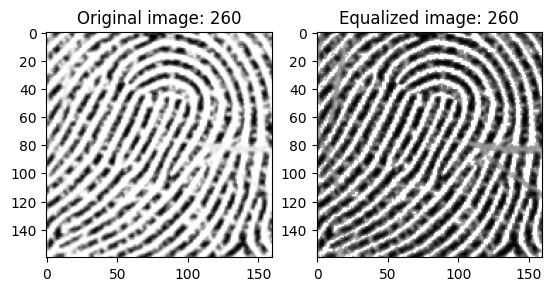

In [141]:
# Determine the numper of the image you want to show
i = 260
# Determine the position of the original image in the shape.
plt.subplot(121)
# show the photo.
plt.imshow(GRAY_image[i], cmap='gray')
plt.title("Original image: " + str(i))
# Determine the position of the equalized image in the shape.
plt.subplot(122)
# show the photo.
plt.imshow(Equalized_Images[i], cmap='gray')
plt.title("Equalized image: " + str(i))
# Show shape.
plt.show()

**Histogram equalization** is a technique that improves the contrast and brightness of an image by adjusting the distribution of pixel intensities. It can make the image more clear and enhance the details. **Global contrast enhancement** is a type of histogram equalization that uses the histogram of the whole image to compute the transformation function. The rationale behind choosing global contrast enhancement is to make the image histogram more uniform and spread over the entire range of intensities. This can improve the overall contrast of the image and make it easier to distinguish different objects and regions. However, global contrast enhancement may also have some drawbacks, such as:

- It may change the mean brightness of the image significantly, which may not be desirable for some applications or users.
- It may not be effective for images with different local characteristics, such as dark and bright regions, or low and high frequencies.
- It may cause data loss, as it maps multiple input values to the same output value, which may reduce the information content of the image.

The expected impact of global contrast enhancement on the image quality and feature extraction are:

- It may improve the image quality by making the image more visually appealing and perceptually consistent.
- It may improve the feature extraction by enhancing the edges and details of the image, which are important for recognition or analysis tasks.
- It may also affect the feature extraction by changing the distribution or values of the features, such as histogram, gradient, or texture, which may require some adaptation or normalization.

----
###  Comparative Analysis:
Now let's see the result of feature extraction before and after applying images enhancement.

Let's began with **local binary patterns (LBP)** and see the result with three different images enhancement: smoothed, sharpened, and equalized.

In [43]:
# This code applies the LBP function to three different types of enhancement images: smoothed, sharpened, and equalized
# and assigns the outputs to six variables
# The LBP function compute the Local Binary Patterns of an image
# Local Binary Patterns are a texture descriptor that measure the local variation of pixel intensities in an image
# They can be used for tasks such as texture classification and recognition

# Call the LBP function on the smoothed images and assign the outputs to two variables
# The LBP function returns two outputs: a list of LBP images and a list of feature vectors for each image
Smooth_LBP_images, Smooth_LBP_features = LBP(Smooth_Images)

# Call the LBP function on the sharpened images and assign the outputs to two variables
# The LBP function returns two outputs: a list of LBP images and a list of feature vectors for each image
sharpened_LBP_images, sharpened_LBP_features = LBP(sharpened_Images)

# Call the LBP function on the equalized images and assign the outputs to two variables
# The LBP function returns two outputs: a list of LBP images and a list of feature vectors for each image
Equalized_LBP_images, Equalized_LBP_features = LBP(Equalized_Images)

Text(0.5, 1.0, 'Equalized LBP images: 260')

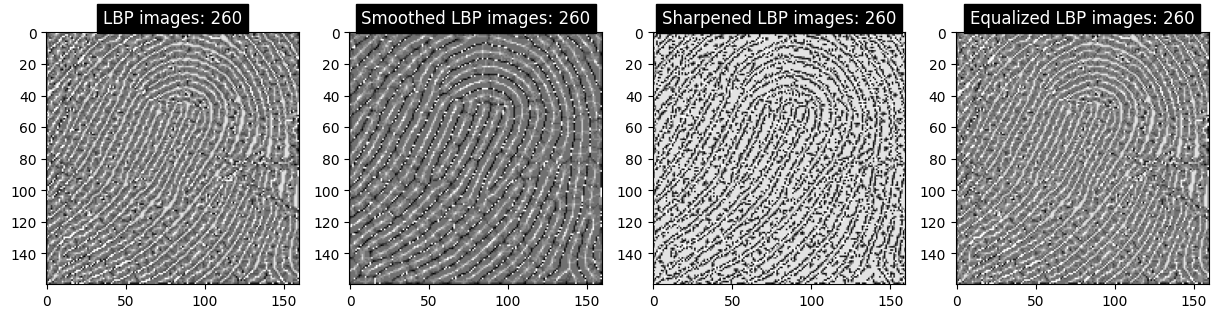

In [156]:
# This code plots four types of images for each index i for all LBP with enhancement techniques & original images.

# Determine the numper of the image you want to show
i = 260

# Create a figure with a size of 15 by 10 inches
fig = plt.figure(figsize=(15, 10))

# Create a grid with one row and four columns
gs = fig.add_gridspec(1, 4)

# Display the original LBP image in the first box
ax1 = fig.add_subplot(gs[0, 0]) # Create a subplot in the first column of the grid
ax1.imshow(LBP_images[i], cmap='gray') # Show the LBP image at index i using a grayscale colormap
ax1.set_title('LBP images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the smoothed LBP image in the secand box.
ax1 = fig.add_subplot(gs[0, 1]) # Create a subplot in the second column of the grid
ax1.imshow(Smooth_LBP_images[i], cmap='gray') # Show the smoothed LBP image in frequency domain at index i using a grayscale colormap
ax1.set_title('Smoothed LBP images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the Sharpened LBP image in the therd box.
ax1 = fig.add_subplot(gs[0, 2]) # Create a subplot in the third column of the grid
ax1.imshow(sharpened_LBP_images[i], cmap='gray') # Show the sharpened LBP image in spatial domain at index i using a grayscale colormap
ax1.set_title('Sharpened LBP images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the equalized LBP image in the fourth box
ax1 = fig.add_subplot(gs[0, 3]) # Create a subplot in the fourth column of the grid
ax1.imshow(Equalized_LBP_images[i], cmap='gray') # Show the equalized LBP image at index i using a grayscale colormap
ax1.set_title('Equalized LBP images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

Now with **histogram of oriented gradients (HOG)** and see the result with three different images enhancement: smoothed, sharpened, and equalized.

In [46]:
# This code applies the HOG function to three different types of enhancement images: smoothed, sharpened, and equalized
# Histogram of Oriented Gradients (HOG) is a feature extraction technique that measures the local orientation and magnitude of edges in an image

# Call the HOG function on the smoothed images and assign the outputs to two variables
# The HOG function returns two outputs: an array of HOG images and an array of HOG features
Smooth_HOG_images, Smooth_HOG_features = HOG(Smooth_Images)

# Call the HOG function on the sharpened images and assign the outputs to two variables
# The HOG function returns two outputs: an array of HOG images and an array of HOG features
sharpened_HOG_images, sharpened_HOG_features = HOG(sharpened_Images)

# Call the HOG function on the equalized images and assign the outputs to two variables
# The HOG function returns two outputs: an array of HOG images and an array of HOG features
Equalized_HOG_images, Equalized_HOG_features = HOG(Equalized_Images)

Text(0.5, 1.0, 'Equalized HOG images: 260')

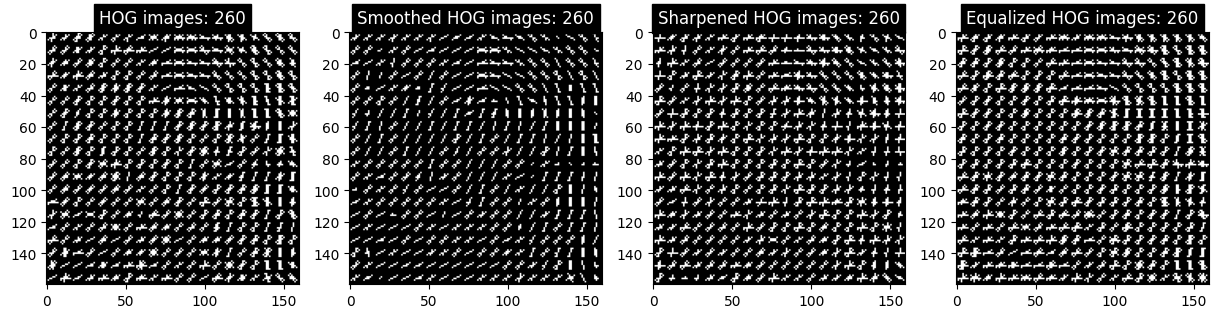

In [157]:
# This code plots four types of images for each index i for all HOG with enhancement techniques & original images.

# Determine the numper of the image you want to show
i = 260

# Create a figure with a size of 15 by 10 inches
fig = plt.figure(figsize=(15, 10))

# Create a grid with one row and four columns
gs = fig.add_gridspec(1, 4)

# Display the original HOG image in the first box
ax1 = fig.add_subplot(gs[0, 0]) # Create a subplot in the first column of the grid
ax1.imshow(HOG_images[i], cmap='gray') # Show the HOG image at index i using a grayscale colormap
ax1.set_title('HOG images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the smoothed HOG image in the secand box.
ax1 = fig.add_subplot(gs[0, 1]) # Create a subplot in the second column of the grid
ax1.imshow(Smooth_HOG_images[i], cmap='gray') # Show the smoothed HOG image in frequency domain at index i using a grayscale colormap
ax1.set_title('Smoothed HOG images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the Sharpened HOG image in the therd box.
ax1 = fig.add_subplot(gs[0, 2]) # Create a subplot in the third column of the grid
ax1.imshow(sharpened_HOG_images[i], cmap='gray') # Show the sharpened HOG image in spatial domain at index i using a grayscale colormap
ax1.set_title('Sharpened HOG images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the equalized HOG image in the fourth box
ax1 = fig.add_subplot(gs[0, 3]) # Create a subplot in the fourth column of the grid
ax1.imshow(Equalized_HOG_images[i], cmap='gray') # Show the equalized HOG image at index i using a grayscale colormap
ax1.set_title('Equalized HOG images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

And now with **scale invariant feature transform (SIFT)** and see the result with three different images enhancement: smoothed, sharpened, and equalized.

In [48]:
# This code applies the SIFT function to three different types of enhancement images: smoothed, sharpened, and equalized
# Scale Invariant Feature Transform is a feature extraction technique that detects and describes local features in images that are invariant to scale, rotation, and illumination changes

# Call the SIFT function on the smoothed images and assign the outputs to two variables
# The SIFT function returns two outputs: an array of SIFT images with SIFT keypoints drawn, and an array of SIFT features
Smooth_SIFT_images, Smooth_SIFT_features = SIFT(Smooth_Images)

# Call the SIFT function on the sharpened images and assign the outputs to two variables
# The SIFT function returns two outputs: an array of SIFT images with SIFT keypoints drawn, and an array of SIFT features
sharpened_SIFT_images, sharpened_SIFT_features = SIFT(sharpened_Images)

# Call the SIFT function on the equalized images and assign the outputs to two variables
# The SIFT function returns two outputs: an array of SIFT images with SIFT keypoints drawn, and an array of SIFT features
Equalized_SIFT_images, Equalized_SIFT_features = SIFT(Equalized_Images)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Equalized SIFT images: 260')

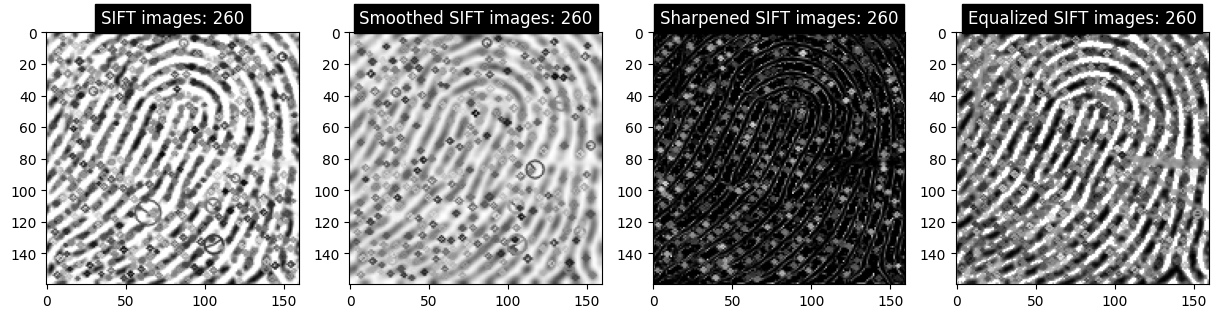

In [158]:
# This code plots four types of images for each index i for all SIFT with enhancement techniques & original images.

# Determine the numper of the image you want to show
i = 260

# Create a figure with a size of 15 by 10 inches
fig = plt.figure(figsize=(15, 10))

# Create a grid with one row and four columns
gs = fig.add_gridspec(1, 4)

# Display the original SIFT image in the first box
ax1 = fig.add_subplot(gs[0, 0]) # Create a subplot in the first column of the grid
ax1.imshow(SIFT_images[i], cmap='gray') # Show the SIFT image at index i using a grayscale colormap
ax1.set_title('SIFT images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the smoothed SIFT image in the secand box.
ax1 = fig.add_subplot(gs[0, 1]) # Create a subplot in the second column of the grid
ax1.imshow(Smooth_SIFT_images[i], cmap='gray') # Show the smoothed SIFT image in frequency domain at index i using a grayscale colormap
ax1.set_title('Smoothed SIFT images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the Sharpened SIFT image in the therd box.
ax1 = fig.add_subplot(gs[0, 2]) # Create a subplot in the third column of the grid
ax1.imshow(sharpened_SIFT_images[i], cmap='gray') # Show the sharpened SIFT image in spatial domain at index i using a grayscale colormap
ax1.set_title('Sharpened SIFT images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

# Display the equalized SIFT image in the fourth box
ax1 = fig.add_subplot(gs[0, 3]) # Create a subplot in the fourth column of the grid
ax1.imshow(Equalized_SIFT_images[i], cmap='gray') # Show the equalized SIFT image at index i using a grayscale colormap
ax1.set_title('Equalized SIFT images: '+str(i), color='white', backgroundcolor='black') # Set the title of the subplot with the index and the color

## Classification Model Implementation
We have obtained 12 different feature extraction techniques so far. To find a suitable classification model for our dataset, we are going to compare the results of three different classifiers using all the features we have extracted. The classifiers are:
1. **Support Vector Classifier (SVC)**

   Support Vector Classifier (SVC) is a machine learning algorithm that can perform classification tasks by finding the optimal hyperplane that separates the data into different classes. It is based on the concept of support vectors, which are the data points that lie closest to the decision boundary and have the most influence on the classifier's performance. SVC can use different kernel functions to transform the data into a higher-dimensional space where it is easier to find a linear separator. Some common kernel functions are linear, polynomial, radial basis function (RBF), and sigmoid.
   
2. **Random Forest Classifier (RFC)**
   
   Random Forest Classifier (RFC) is a machine learning algorithm that can perform classification tasks by using an ensemble of decision trees. It is based on the idea of bagging, which means combining the predictions of multiple models to reduce the variance and improve the accuracy. Each decision tree in the ensemble is trained on a random subset of the data and a random subset of the features, which makes the trees diverse and robust to noise and outliers. The final prediction of the RFC is the majority vote of the individual trees.

3. **Extra Trees Classifier (ETC)**
   
   Extra Trees Classifier (ETC) is a machine learning algorithm that can perform classification tasks by using an ensemble of randomized decision trees. It is similar to Random Forest Classifier, but it has some differences:

   - ETC does not use bootstrap sampling to create the sub-samples of the dataset for each tree. Instead, it uses the whole original dataset.
   - ETC randomly selects the split point for each feature at each node, instead of finding the best split point based on some criterion (such as Gini index or information gain).

   These differences make ETC faster and more robust to noise and irrelevant features than Random Forest Classifier. However, they also introduce more randomness and variability in the results, which may affect the accuracy and interpretability of the model.
   



In [162]:
# This code defines a function called split_data that takes two arrays of features and labels, and splits them into training and testing sets
# The function uses the train_test_split function from the sklearn.model_selection module to perform the split
# The function also takes three optional parameters: Test_size, Random_state, and Shuffle, which control the size, randomness, and shuffling of the split
# The function returns four outputs: x_training, x_testing, y_training_labels, and y_testing_labels, which are the arrays of features and labels for the training and testing sets

def split_data(x, y, Test_size=0.2, Random_state=1, Shuffle=True):
    # Use the train_test_split function to split the features and labels arrays into training and testing sets
    # The test_size parameter determines the proportion of the data that is assigned to the testing set
    # The random_state parameter sets the seed for the random number generator that is used for the split
    # The shuffle parameter determines whether to shuffle the data before splitting
    x_training, x_testing, y_training_labels, y_testing_labels = train_test_split(x,
                                                                                  y,
                                                                                  test_size=Test_size,
                                                                                  random_state=Random_state,
                                                                                  shuffle=Shuffle)
    
    # Reshape the labels arrays to have one column and the same number of rows as the features arrays
    # This is done to ensure compatibility with some machine learning algorithms that require this format
    y_testing_labels = y_testing_labels.reshape((y_testing_labels.shape)[0], 1) 
    y_training_labels = y_training_labels.reshape((y_training_labels.shape)[0], 1) 
    
    # Return the four arrays of features and labels for the training and testing sets
    return x_training, x_testing, y_training_labels, y_testing_labels

In [179]:
# Define a function to test different classifiers on a given set of features and labels
def test(features, labels, features_name, Test_size=0.2, Random_state=1, Shuffle=True):
    
    # Split the data into training and testing sets
    x_training,x_testing,y_training_labels,y_testing_labels = split_data(features, labels, Test_size, Random_state, Shuffle)
    
    # Create and fit a random forest classifier
    clf = RandomForestClassifier()  
    clf.fit(x_training, y_training_labels) 
    # Predict and score on the testing set
    y_pred = clf.predict(x_testing) 
    score = accuracy_score(y_pred, y_testing_labels)
    # Predict and score on the training set
    y_pred2 = clf.predict(x_training) 
    score2 = accuracy_score(y_pred2, y_training_labels)
    
    # Create and fit a SVM classifier with a polynomial kernel
    clf = svm.SVC(kernel='poly')
    clf.fit(x_training, y_training_labels)
    # Predict and score on the testing set
    y_pred3 = clf.predict(x_testing)
    score3 = accuracy_score(y_pred3, y_testing_labels)
    # Predict and score on the training set
    y_pred4 = clf.predict(x_training)
    score4 = accuracy_score(y_pred4, y_training_labels) 
    
    # Create and fit an extra trees classifier
    clf = ExtraTreesClassifier()
    clf.fit(x_training, y_training_labels)
    # Predict and score on the testing set
    y_pred5 = clf.predict(x_testing)
    score5 = accuracy_score(y_pred5, y_testing_labels)
    # Predict and score on the training set
    y_pred6 = clf.predict(x_training)
    score6 = accuracy_score(y_pred6, y_training_labels) 
    
    # Print the name of the features and the shapes of the data sets
    print(f"------------------{features_name}----------------------")
    
    print("x_training: ",x_training.shape, " | y_training: ", y_training_labels.shape)
    print("x_testing: ",x_testing.shape, " | y_testing: ",y_testing_labels.shape)
    
    # Print the scores of each classifier
    print("Random Forest Classifier")
    print("score of test images: ",score)
    print("score of train images: ",score2)
    
    print("SVM Classifier")
    print("score of test images: ",score3)
    print("score of train images: ",score4)
    
    print("Extra Trees Classifier")
    print("score of test images: ",score5)
    print("score of train images: ",score6)
    print("----------------------------------------")

Let's begin with local binary patterns (LBP) features.

In [176]:
# This code prints the results of testing different types of LBP features on a dataset of labeled images
# The code uses a function called test that takes three arguments: a matrix of features, a vector of labels, and a string of feature name
# The code tests four types of LBP features: original, smoothed, sharpened, and equalized
# The code prints the accuracy and confusion matrix for each type of LBP feature

print("-------------------LBP-------------------------")
test(LBP_features, label_data, "LBP features") # test original LBP features
test(Smooth_LBP_features, label_data, "Smoothed LBP features") # test smoothed LBP features
test(sharpened_LBP_features, label_data, "sharpened LBP features") # test sharpened LBP features
test(Equalized_LBP_features, label_data, "Equalized LBP features")# test equalized LBP features

-------------------LBP-------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------LBP features----------------------
x_training:  (640, 160)  | y_training:  (640, 1)
x_testing:  (160, 160)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.6875
score of train images:  1.0
SVM Classifier
score of test images:  0.675
score of train images:  0.946875
Extra Trees Classifier
score of test images:  0.71875
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------Smoothed LBP features----------------------
x_training:  (640, 160)  | y_training:  (640, 1)
x_testing:  (160, 160)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.7
score of train images:  1.0
SVM Classifier
score of test images:  0.64375
score of train images:  0.734375
Extra Trees Classifier
score of test images:  0.78125
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------sharpened LBP features----------------------
x_training:  (640, 160)  | y_training:  (640, 1)
x_testing:  (160, 160)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.55
score of train images:  1.0
SVM Classifier
score of test images:  0.19375
score of train images:  0.325
Extra Trees Classifier
score of test images:  0.6125
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------Equalized LBP features----------------------
x_training:  (640, 160)  | y_training:  (640, 1)
x_testing:  (160, 160)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.6625
score of train images:  1.0
SVM Classifier
score of test images:  0.7125
score of train images:  0.9359375
Extra Trees Classifier
score of test images:  0.70625
score of train images:  1.0
----------------------------------------


Then Let's do the same with histogram of oriented gradients (HOG) features.

In [177]:
# This code prints the results of testing different types of HOG features on a dataset of labeled images
# The code uses a function called test that takes three arguments: a matrix of features, a vector of labels, and a string of feature name
# The code tests four types of HOG features: original, smoothed, sharpened, and equalized
# The code prints the accuracy and confusion matrix for each type of HOG feature

print("-------------------HOG-------------------------")
test(HOG_features, label_data, "HOG features") # test original HOG features
test(Smooth_HOG_features, label_data, "Smoothed HOG features") # test smoothed HOG features
test(sharpened_HOG_features, label_data, "sharpened HOG features") # test sharpened HOG features
test(Equalized_HOG_features, label_data, "Equalize HOG features") # test equalized HOG features

-------------------HOG-------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------HOG features----------------------
x_training:  (640, 12996)  | y_training:  (640, 1)
x_testing:  (160, 12996)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.59375
score of train images:  1.0
SVM Classifier
score of test images:  0.86875
score of train images:  1.0
Extra Trees Classifier
score of test images:  0.66875
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------Smoothed HOG features----------------------
x_training:  (640, 12996)  | y_training:  (640, 1)
x_testing:  (160, 12996)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.5
score of train images:  1.0
SVM Classifier
score of test images:  0.8125
score of train images:  1.0
Extra Trees Classifier
score of test images:  0.63125
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------sharpened HOG features----------------------
x_training:  (640, 12996)  | y_training:  (640, 1)
x_testing:  (160, 12996)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.325
score of train images:  1.0
SVM Classifier
score of test images:  0.53125
score of train images:  1.0
Extra Trees Classifier
score of test images:  0.33125
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------Equalize HOG features----------------------
x_training:  (640, 12996)  | y_training:  (640, 1)
x_testing:  (160, 12996)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.6375
score of train images:  1.0
SVM Classifier
score of test images:  0.89375
score of train images:  1.0
Extra Trees Classifier
score of test images:  0.725
score of train images:  1.0
----------------------------------------


Finaly with scale invariant feature transform (SIFT) features.

In [178]:
# This code prints the results of testing different types of SIFT features on a dataset of labeled images
# The code uses a function called test that takes three arguments: a matrix of features, a vector of labels, and a string of feature name
# The code tests four types of SIFT features: original, smoothed, sharpened, and equalized
# The code prints the accuracy and confusion matrix for each type of SIFT feature

print("-------------------SIFT-------------------------")
test(SIFT_features, label_data, "SIFT features") # test original SIFT features
test(Smooth_SIFT_features, label_data, "Smoothed SIFT features") # test smoothed SIFT features
test(sharpened_SIFT_features, label_data, "sharpened SIFT features") # test sharpened SIFT features
test(Equalized_SIFT_features, label_data, "Equalized SIFT features") # test equalized SIFT features

-------------------SIFT-------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------SIFT features----------------------
x_training:  (640, 100)  | y_training:  (640, 1)
x_testing:  (160, 100)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.8875
score of train images:  1.0
SVM Classifier
score of test images:  0.9625
score of train images:  0.9984375
Extra Trees Classifier
score of test images:  0.90625
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------Smoothed SIFT features----------------------
x_training:  (640, 100)  | y_training:  (640, 1)
x_testing:  (160, 100)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.90625
score of train images:  1.0
SVM Classifier
score of test images:  0.975
score of train images:  1.0
Extra Trees Classifier
score of test images:  0.925
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------sharpened SIFT features----------------------
x_training:  (640, 100)  | y_training:  (640, 1)
x_testing:  (160, 100)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.68125
score of train images:  1.0
SVM Classifier
score of test images:  0.8125
score of train images:  1.0
Extra Trees Classifier
score of test images:  0.73125
score of train images:  1.0
----------------------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\3721136503.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_training, y_training_labels)


------------------Equalized SIFT features----------------------
x_training:  (640, 100)  | y_training:  (640, 1)
x_testing:  (160, 100)  | y_testing:  (160, 1)
Random Forest Classifier
score of test images:  0.90625
score of train images:  1.0
SVM Classifier
score of test images:  0.99375
score of train images:  0.9984375
Extra Trees Classifier
score of test images:  0.96875
score of train images:  1.0
----------------------------------------


---
The support vector classifier (SVC) has the best results among the three classifiers.

Therefore, we will use SVM as our classifier, and use the top three features from each feature extraction technique.

which are:
1. HOG features
2. Equalized LBP features
3. Equalized SIFT features

### Confusion Matrix
**Confusion Matrix** metrics are performance measures which help us find the accuracy of our classifier. There are four main metrics.

1.   **Accuracy :** The accuracy is used to find the portion of correctly classified values. It tells us how often our classifier is right.
It is the sum of all true values divided by total values.

\begin{align}
accuracy &= \dfrac{TP + TN}{TP + TN + FP + FN}
\end{align}

2.   **Precision :** Precision is used to calculate the model's ability to classify positive values correctly. It answers the question, "When the model predicts a positive value, how often is it right?". It is the true positives divided by total number of predicted positive values.

\begin{align}
Precision &= \dfrac{TP}{TP + FP}
\end{align}

3.   **Recall :** It is used to calculate the model's ability to predict positive values. "How often does the model actually predict the correct positive values?". It is the true positives divided by total of actual positive values.

\begin{align}
Recall &= \dfrac{TP}{TP + FN}
\end{align}

4.   **F1-Score :** It is the harmonic mean of Recall and Precision. It is useful when you need to take both Precision and Recall into account.

\begin{align}
F1-Score &= \dfrac{2*Precision*Recall}{Precision + Recall}
\end{align}


In [53]:
# Define a function to test a SVM classifier with a polynomial kernel on a given set of features and labels
def SVM_predict(x, y, features_name, Test_size=0.2): 
    
    # Split the data into training and testing sets
    x_training, x_testing, y_training_labels, y_testing_labels = split_data(x, y, Test_size)
    
    # Create and fit a SVM classifier
    clf = svm.SVC(kernel='poly')
    clf.fit(x_training, y_training_labels)
    # Predict and score on the testing set
    y_pred1 = clf.predict(x_testing)
    score1 = accuracy_score(y_pred1, y_testing_labels)
    # Predict and score on the training set
    y_pred2 = clf.predict(x_training)
    score2 = accuracy_score(y_pred2, y_training_labels) 
    
    # Print the name of the features and the scores of the classifier
    print("---------------SVM---------------")
    print(f"---------------{features_name}---------------")
    print("score of test data:  ",score1)
    print("score of train data: ",score2)
    # Print the confusion matrices for the testing and training data
    print("---------------Confusion Matrix---------------")
    print("Confusion matrix for testing data:")
    print(classification_report(y_testing_labels, y_pred1))
    print("Confusion matrix for training data:")
    print(classification_report(y_training_labels, y_pred2))
    
    # Compute and return the confusion matrices for the testing and training data
    cm1 = confusion_matrix(y_testing_labels, y_pred1)
    cm2 = confusion_matrix(y_training_labels, y_pred2)
    return cm1, cm2

Now let's print the confusion matrices for the testing and training data for the equalized SIFT features.

In [60]:
# Call the SVM_predict function with equalized SIFT features and label data, and store the returned confusion matrices in SIFT_cm1 and SIFT_cm2
SIFT_cm1, SIFT_cm2 = SVM_predict(Equalized_SIFT_features, label_data, "Equalized SIFT features")

---------------SVM---------------
---------------Equalized SIFT features---------------
score of test data:   0.99375
score of train data:  0.9984375
---------------Confusion Matrix---------------
Confusion matrix for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        15
           5       1.00      0.93      0.96        14
           6       1.00      1.00      1.00        19
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        19

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

Confusion

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Then do the same with HOG features.

In [61]:
# Call the SVM_predict function with HOG features and label data, and store the returned confusion matrices in HOG_cm1 and HOG_cm2
HOG_cm1, HOG_cm2 = SVM_predict(HOG_features, label_data, "HOG features")

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------SVM---------------
---------------HOG features---------------
score of test data:   0.86875
score of train data:  1.0
---------------Confusion Matrix---------------
Confusion matrix for testing data:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.69      0.79      0.73        14
           2       1.00      1.00      1.00        12
           3       0.89      0.94      0.91        17
           4       0.91      0.67      0.77        15
           5       0.85      0.79      0.81        14
           6       1.00      1.00      1.00        19
           7       0.62      1.00      0.76         8
           8       0.96      0.92      0.94        24
           9       0.79      0.79      0.79        19

    accuracy                           0.87       160
   macro avg       0.86      0.87      0.86       160
weighted avg       0.88      0.87      0.87       160

Confusion matrix for train

Fianly with equalized LBP features.

In [62]:
# Call the SVM_predict function with equalized LBP features and label data, and store the returned confusion matrices in LBP_cm1 and LBP_cm2
LBP_cm1, LBP_cm2 = SVM_predict(Equalized_LBP_features, label_data, "Equalized LBP features")

---------------SVM---------------
---------------Equalized LBP features---------------
score of test data:   0.7125
score of train data:  0.9359375
---------------Confusion Matrix---------------
Confusion matrix for testing data:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.47      0.64      0.55        14
           2       0.71      0.83      0.77        12
           3       0.87      0.76      0.81        17
           4       0.53      0.60      0.56        15
           5       0.65      0.79      0.71        14
           6       0.82      0.47      0.60        19
           7       0.55      0.75      0.63         8
           8       0.86      0.75      0.80        24
           9       1.00      0.74      0.85        19

    accuracy                           0.71       160
   macro avg       0.72      0.72      0.70       160
weighted avg       0.75      0.71      0.72       160

Confusion m

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Let's see more clear detail of the prediction of these classifier.

<Axes: >

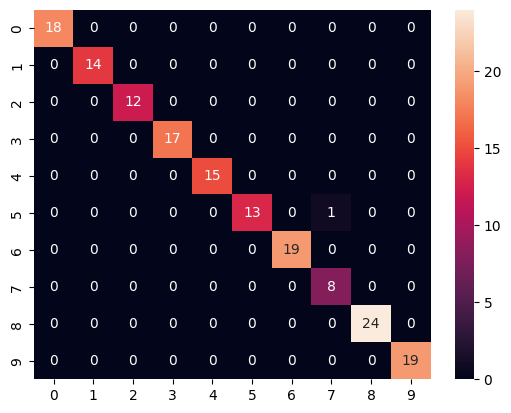

In [63]:
# Plot a heatmap of the confusion matrix for the testing data of the SVM classifier with equalized SIFT features
# The confusion matrix is stored in SIFT_cm1, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(SIFT_cm1, annot=True)

The SVM classifier with equalized SIFT features for test data achieved a high accuracy by correctly predicting all labels except one. It misclassified an image of class 5 as class 7.

<Axes: >

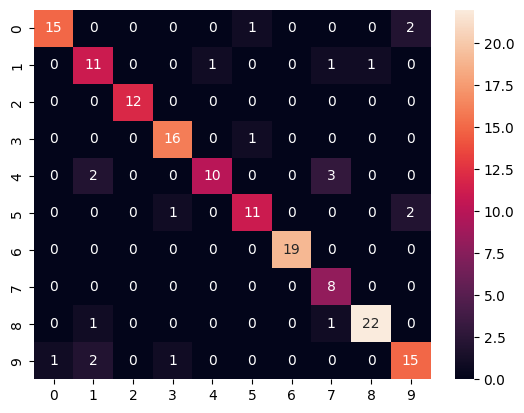

In [64]:
# Plot a heatmap of the confusion matrix for the testing data of the SVM classifier with HOG features
# The confusion matrix is stored in HOG_cm1, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(HOG_cm1, annot=True)

The SVM classifier with HOG features for test data made some correct and some incorrect predictions. The accuracy was moderate.

<Axes: >

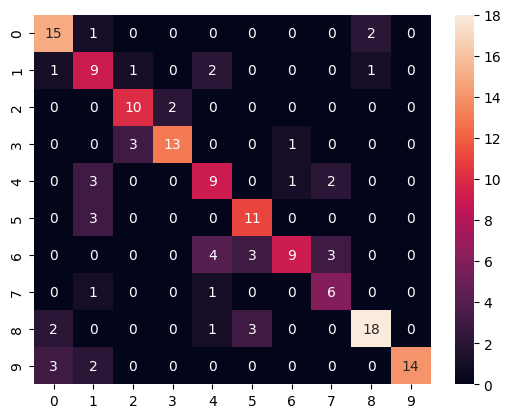

In [65]:
# Plot a heatmap of the confusion matrix for the testing data of the SVM classifier with equalized LBP features
# The confusion matrix is stored in LBP_cm1, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(LBP_cm1, annot=True)

The SVM classifier with equalized LBP features for test data performed poorly and made many incorrect predictions.

<Axes: >

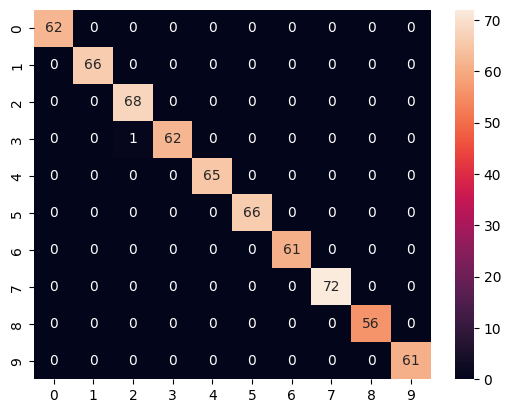

In [66]:
# Plot a heatmap of the confusion matrix for the training data of the SVM classifier with equalized SIFT features
# The confusion matrix is stored in SIFT_cm2, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(SIFT_cm2, annot=True)

The SVM classifier with equalized SIFT features for train data achieved a high accuracy by correctly predicting all labels except one. It misclassified an image of class 3 as class 2.

<Axes: >

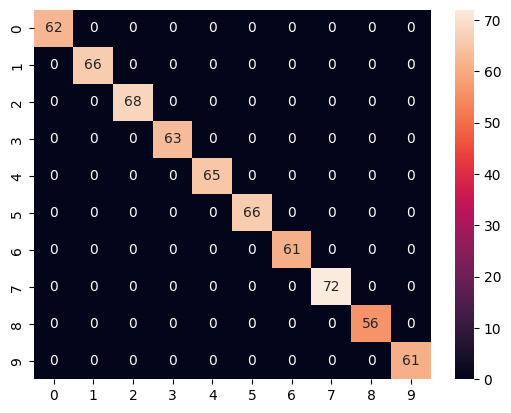

In [67]:
# Plot a heatmap of the confusion matrix for the training data of the SVM classifier with HOG features
# The confusion matrix is stored in HOG_cm2, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(HOG_cm2, annot=True)

The SVM classifier with HOG features for train data achieved a high accuracy by correctly predicting all labels.

<Axes: >

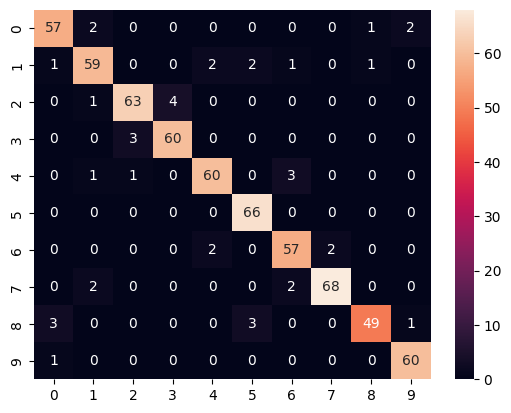

In [68]:
# Plot a heatmap of the confusion matrix for the training data of the SVM classifier with equalized LBP features
# The confusion matrix is stored in LBP_cm2, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(LBP_cm2, annot=True)

The SVM classifier with equalized LBP features for train data made some correct and some incorrect predictions. The accuracy was moderate.

## Ensemble Techniques
Ensemble techniques are methods of combining multiple machine learning models to improve the overall performance and accuracy of the predictions. They are based on the idea that a group of models can achieve better results than a single model by leveraging the diversity and complementarity of the individual models. Some common ensemble techniques are:

- Voting: A simple technique that takes the majority vote (for classification) or the average (for regression) of the predictions of multiple models.
- Averaging: A technique that takes the mean of the predictions of multiple models, which can reduce the variance and smooth out the errors.
- Weighted averaging: A technique that assigns different weights to the predictions of multiple models, based on their performance or importance.
- Stacking: A technique that uses a meta-model to learn how to best combine the predictions of multiple models, based on a validation set.
- Blending: A technique similar to stacking, but uses a holdout set instead of a validation set to train the meta-model.
- Bagging: A technique that creates multiple models from different subsets of the training data, using bootstrap sampling, and then aggregates their predictions.
- Boosting: A technique that creates a sequence of models, where each model tries to correct the errors of the previous one, by giving more weight to the misclassified samples.

We will use hard voting technique for our models.

In classification, voting can be hard or soft. Hard voting chooses the class label with the most votes from the models. Soft voting calculates the average of the predicted probabilities of the class labels from the models.

In [73]:
# This function takes four arrays of features and labels, and performs an ensemble learning technique using three different feature extraction methods
# The function returns the confusion matrices for the testing and training data as outputs
def Ensemble(features1, features2, features3, labels):
    x_training1, x_testing1, y_training_labels1, y_testing_labels1 = split_data(features1, labels)
    x_training2, x_testing2, y_training_labels2, y_testing_labels2 = split_data(features2, labels)
    x_training3, x_testing3, y_training_labels3, y_testing_labels3 = split_data(features3, labels)
    
    # Create three support vector machine classifiers with a polynomial kernel
    clf1 = svm.SVC(kernel='poly')
    clf2 = svm.SVC(kernel='poly')
    clf3 = svm.SVC(kernel='poly')
    
    # Fit the classifiers on the training sets for each feature extraction method
    # The fit method takes two arrays of features and labels as inputs, and trains the classifier on the data
    clf1.fit(x_training1, y_training_labels1)
    clf2.fit(x_training2, y_training_labels2)
    clf3.fit(x_training3, y_training_labels3)
    
    # Make predictions on the testing sets for each feature extraction method
    # The predict method takes an array of features as input, and returns an array of predictions as output
    y_pred1_1 = clf1.predict(x_testing1)
    y_pred1_2 = clf2.predict(x_testing2)
    y_pred1_3 = clf3.predict(x_testing3)
    
    # Calculate the accuracy score for each classifier on the testing sets
    # The accuracy_score function takes two arrays of true labels and predicted labels as inputs, and returns a float value as output
    # The accuracy_score function measures the fraction of correct predictions among the total number of predictions
    score1_1 = accuracy_score(y_pred1_1, y_testing_labels1)
    score1_2 = accuracy_score(y_pred1_2, y_testing_labels2)
    score1_3 = accuracy_score(y_pred1_3, y_testing_labels3)
    
    # Make predictions on the training sets for each feature extraction method
    # The predict method takes an array of features as input, and returns an array of predictions as output
    y_pred2_1 = clf1.predict(x_training1)
    y_pred2_2 = clf2.predict(x_training2)
    y_pred2_3 = clf3.predict(x_training3)
    
    # Calculate the accuracy score for each classifier on the training sets
    # The accuracy_score function takes two arrays of true labels and predicted labels as inputs, and returns a float value as output
    # The accuracy_score function measures the fraction of correct predictions among the total number of predictions
    score2_1 = accuracy_score(y_pred2_1, y_training_labels1)
    score2_2 = accuracy_score(y_pred2_2, y_training_labels2)
    score2_3 = accuracy_score(y_pred2_3, y_training_labels3)
    
    # Combine the predictions of the three classifiers using the mode function
    # The mode function takes a list of arrays as input, and an optional parameter called axis, which specifies the axis along which to operate
    # The mode function returns two outputs: an array of the most frequent values, and an array of their counts
    # The [0] index is used to access the first output, which is the array of the most frequent values
    Ensemble_y_pred1 = stats.mode([y_pred1_1, y_pred1_2, y_pred1_3], axis=0)[0]
    Ensemble_y_pred2 = stats.mode([y_pred2_1, y_pred2_2, y_pred2_3], axis=0)[0]
    
    # Reshape the combined predictions to have one column and the same number of rows as the testing sets
    # The reshape method takes a tuple of dimensions as input, and returns a new array with the specified shape
    # The (shape)[0] index is used to access the first dimension of the array, which is the number of rows
    # The 1 is used to specify the number of columns
    Ensemble_y_pred1 = Ensemble_y_pred1.reshape((Ensemble_y_pred1.shape)[1], 1) 
    Ensemble_y_pred2 = Ensemble_y_pred2.reshape((Ensemble_y_pred2.shape)[1], 1) 
    
    # Calculate the accuracy score for the combined predictions on the testing and training sets
    # The accuracy_score function takes two arrays of true labels and predicted labels as inputs, and returns a float value as output
    # The accuracy_score function measures the fraction of correct predictions among the total number of predictions
    score3_1 = accuracy_score(Ensemble_y_pred1, y_testing_labels1)
    score3_2 = accuracy_score(Ensemble_y_pred2, y_training_labels1)
    
    # Print the score and the confusion matrix for the testing and training data
    # The classification_report function provides a summary of the precision, recall, f1-score, and support for each class
    # The confusion_matrix function provides a count of the true positives, false positives, true negatives, and false negatives for each class
    print("Score after ensembling 3 feature extraction techniques: ")
    print("score of test data:  ",score3_1)
    print("score of train data: ",score3_2)
    
    print("Confusion matrix for testing data:")
    print(classification_report(y_testing_labels1, Ensemble_y_pred1))
    print("Confusion matrix for training data:")
    print(classification_report(y_training_labels1, Ensemble_y_pred2))
    
    # Return the confusion matrices for the testing and training data as outputs
    cm1 = confusion_matrix(y_testing_labels1, Ensemble_y_pred1)
    cm2 = confusion_matrix(y_training_labels2, Ensemble_y_pred2)
    return cm1, cm2

We will use an ensemble of the feature extraction techniques we obtained previously. 

They are:
- HOG features
- Equalized LBP features
- Equalized SIFT features


In [74]:
# Call the Ensemble function with three features and label data, and store the returned confusion matrices in e_cm1 and e_cm2
e_cm1, e_cm2 = Ensemble(Equalized_SIFT_features, HOG_features, Equalized_LBP_features, label_data)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score after ensembling 3 feature extraction techniques: 
score of test data:   0.9375
score of train data:  1.0
Confusion matrix for testing data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.73      0.79      0.76        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17
           4       0.92      0.73      0.81        15
           5       0.92      0.86      0.89        14
           6       1.00      1.00      1.00        19
           7       0.80      1.00      0.89         8
           8       0.96      0.96      0.96        24
           9       1.00      1.00      1.00        19

    accuracy                           0.94       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.94      0.94      0.94       160

Confusion matrix for training data:
              precision    recall  f1-score   support

   

C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\1120002578.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Ensemble_y_pred1 = stats.mode([y_pred1_1, y_pred1_2, y_pred1_3], axis=0)[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\1120002578.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

After using an ensemble of these feature extraction techniques, the training data achieved an excellent result, but the testing data was in the middle of the three feature extraction techniques results. It was better than two of them, but worse than one of them, which had a 99% accuracy of true class.

<Axes: >

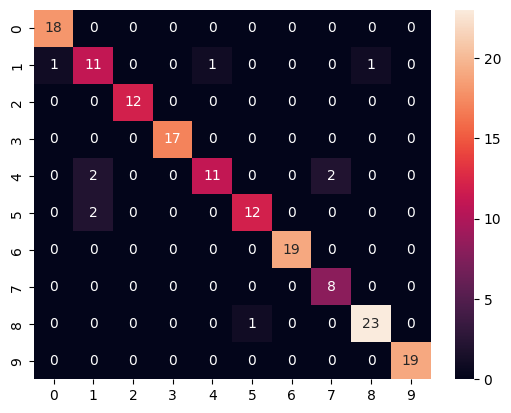

In [75]:
# Plot a heatmap of the confusion matrix for the testing data of the SVM classifier with ensembled features
# The confusion matrix is stored in e_cm1, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(e_cm1, annot=True)

The SVM classifier with ensemble of these feature extraction techniques for test data made some correct and some incorrect predictions. The accuracy was moderate but worse than the equalized SIFT features.

<Axes: >

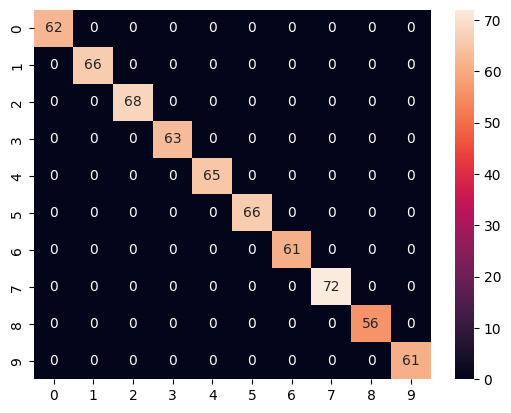

In [76]:
# Plot a heatmap of the confusion matrix for the training data of the SVM classifier with ensembled features
# The confusion matrix is stored in e_cm2, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(e_cm2, annot=True)

The SVM classifier with ensemble of these feature extraction techniques for train data achieved a high accuracy by correctly predicting all labels.

---
We have seen that the SIFT techniques with different enhancement methods have the highest prediction results. So, what if we only consider SIFT features and use an ensemble of them?

We will select the three best SIFT features prediction results, which are:
1. SIFT features
2. Smooth SIFT features
3. Equalized SIFT features

In [77]:
# Call the Ensemble function with three features and label data, and store the returned confusion matrices in e_cm1 and e_cm2
e_cm1, e_cm2 = Ensemble(Equalized_SIFT_features, SIFT_features, Smooth_SIFT_features, label_data)

Score after ensembling 3 feature extraction techniques: 
score of test data:   1.0
score of train data:  1.0
Confusion matrix for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        19

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Confusion matrix for training data:
              precision    recall  f1-score   support

      

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_45592\1120002578.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it 

Wow incredible result, it look like it predict all the data right.

<Axes: >

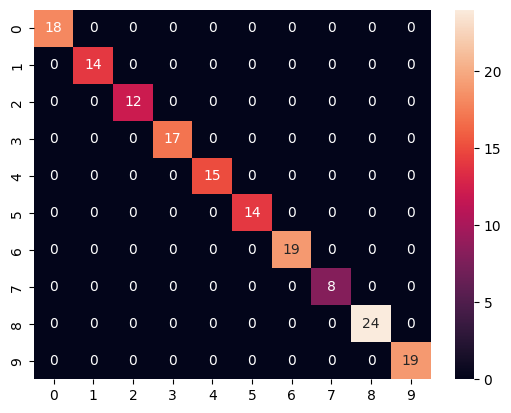

In [78]:
# Plot a heatmap of the confusion matrix for the testing data of the SVM classifier with ensembled features
# The confusion matrix is stored in e_cm1, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(e_cm1, annot=True)

<Axes: >

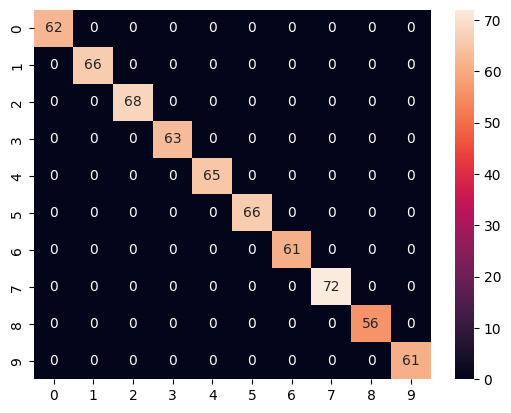

In [79]:
# Plot a heatmap of the confusion matrix for the training data of the SVM classifier with ensembled features
# The confusion matrix is stored in e_cm2, which was returned by the SVM_predict function
# The annot parameter is set to True, which means the data values will be written in each cell of the heatmap
sns.heatmap(e_cm2, annot=True)

## Conclusion
We applied three feature extraction techniques and three enhancement techniques to the fingerprint dataset, and we found that scale invariant feature transform (SIFT) was the most effective method to identify and characterize keypoints in a fingerprint image. SIFT was able to capture the distinctive patterns and ridges of the fingerprints, which are crucial for classification. Out of all the techniques we used, SIFT achieved the best accuracy and precision. We also observed that histogram equalization was a useful enhancement technique that enhanced the contrast and brightness of the images, which made the features more visible and clear. Lastly, we used an ensemble technique that combined the predictions of multiple features to improve the overall performance and robustness. The ensemble technique was amazing, as it leveraged the strengths and compensated the weaknesses of the individual models.


## Reference
<h3>Some of the resource and people help us to do the assignment:</h3>


<font color='black'>
<ul>
<li> <b>Scale-Invariant Feature Transform</b> at <a href="https://www.baeldung.com/cs/scale-invariant-feature-transform"> Baeldung</a> </li>
    
<li> <b>Histogram of Oriented Gradients</b> at <a href="https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html">scikit-image</a></li>

<li> <b>Analysis of Different Image Enhancement and Feature Extraction Methods</b> at <a href="https://www.mdpi.com/2227-7390/10/14/2407">MDPI</a></li>
 
<li> <b>Create Local Binary Pattern of an image using OpenCV-Python</b> at <a href="https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/">geeksforgeeks</a></li>
    
<li> <b>Fingerprint Dataset for FVC2000_DB4_B</b> at <a href="https://www.kaggle.com/datasets/peace1019/fingerprint-dataset-for-fvc2000-db4-b">Kaggle</a></li>  
    
<li> <b>Train_and_Eval_20200410</b> at <a href="https://www.kaggle.com/code/peace1019/train-and-eval-20200410">Kaggle</a></li>   
    
<li> <b>Local Binary Pattern for texture classification</b> at <a href="https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html">scikit-image</a></li>
    
<li> <b>Local Binary Patterns with Python and OpenCV</b> at <a href="https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/">pyimagesearch</a></li>
    
<li> <b>Understanding the Local Binary Pattern (LBP): A Powerful Method for Texture Analysis in Computer Vision</b> at <a href="https://aihalapathirana.medium.com/understanding-the-local-binary-pattern-lbp-a-powerful-method-for-texture-analysis-in-computer-4fb55b3ed8b8">medium</a></li> 
    
<li> <b>Histogram Equalization in Digital Image Processing</b> at <a href="https://www.geeksforgeeks.org/histogram-equalization-in-digital-image-processing/">geeksforgeeks</a></li> 
    
<li> <b>Image Enhancement Techniques using OpenCV – Python</b> at <a href="https://www.geeksforgeeks.org/image-enhancement-techniques-using-opencv-python/">geeksforgeeks</a></li> 
    
<li> <b>Image Sharpening Using Laplacian Filter and High Boost Filtering in MATLAB</b> at <a href="https://www.geeksforgeeks.org/image-sharpening-using-laplacian-filter-and-high-boost-filtering-in-matlab/">geeksforgeeks</a></li> 
    
<li> <b>Image Processing: Techniques, Types, and Applications</b> at <a href="https://www.v7labs.com/blog/image-processing-guide">V7</a></li> 
    
<li> <b>What is Histogram Equalization and how it works?</b> at <a href="https://www.mygreatlearning.com/blog/histogram-equalization-explained/">Great Learning</a></li> 
    
<li> <b>sklearn.svm.SVC</b> at <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">scikit-learn</a></li> 
    
<li> <b>1.4. Support Vector Machines</b> at <a href="https://scikit-learn.org/stable/modules/svm.html">scikit-learn</a></li> 
    
<li> <b>Support vector machine</b> at <a href="https://en.wikipedia.org/wiki/Support_vector_machine">wikipedia</a></li> 
    
<li> <b>sklearn.ensemble.ExtraTreesClassifier</b> at <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">scikit-learn</a></li> 
    
<li> <b>ML | Extra Tree Classifier for Feature Selection</b> at <a href="https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/">geeksforgeeks</a></li> 
    
<li> <b>between Extra Trees and Random Forest?</b> at <a href="https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/">QuantDare</a></li> 
    
<li> <b>sklearn.ensemble.RandomForestClassifier</b> at <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">scikit-learn</a></li> 
    
<li> <b>Random forest</b> at <a href="https://en.wikipedia.org/wiki/Random_forest">wikipedia</a></li> 
    
<li> <b>Random Forest Classification with Scikit-Learn</b> at <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python">datacamp</a></li> 
    
<li> <b>A Comprehensive Guide to Ensemble Learning (with Python codes)</b> at <a href="https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/">Analytics Vidhya</a></li> 
    
<li> <b>The Complete Guide to Ensemble Learning</b> at <a href="https://www.v7labs.com/blog/ensemble-learning">V7</a></li> 
    
<li> <b>158 - Convolutional filters + Random Forest for image classification.</b> at <a href="https://youtu.be/9GzfUzJeyi0?feature=shared">YouTube</a></li> 
    
<li> <b>57 - How to generate features in Python for machine learning?</b> at <a href="https://youtu.be/yUATC9tt7OM?feature=shared">YouTube</a></li> 
    
</ul>
</font>